最佳位置:0.44839126144234775,11.902496396004834
最佳解:283.8873922936938
最佳位置:0.5669304661713406,8.21187952943625
最佳解:135.6483631728701
最佳位置:1.0392432572131902,-8.717796545082315
最佳解:135.6483631728701
最佳位置:-2.2155533345644565,4.911312901117796
最佳解:53.50944132162905
最佳位置:3.6507348426972244,1.1179616200339364
最佳解:16.153742574523726
最佳位置:0.34153730844971086,0.1841809994927992
最佳解:0.2819972728006445
最佳位置:0.302286272526494,0.19521714845728072
最佳解:0.24576915517753448
最佳位置:0.30900782844733893,0.21610101190423756
最佳解:0.22284396474782583
最佳位置:-0.00617672898146901,0.06177898477019417
最佳解:0.09398869254502074
最佳位置:-0.030476456106200877,0.025386878053584194
最佳解:0.029025407162846573


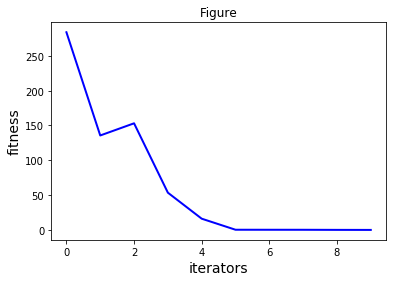

In [48]:
import numpy as np    #進行陣列與矩陣運算
import random    #產生隨機亂數
import matplotlib.pyplot as plt    #將資料視覺化
import math    #進行數學運算
from operator import itemgetter, attrgetter


class VOA():
    def __init__(self,VN,SV,CV,dim,obj,org,temp,SVn,CVn,intensive,avg,genertion):
        self.VN = VN  #number of virus
        self.SV = SV  #number of strong virus
        self.CV = CV  #number of common virus
        self.dim = dim  #dimension
        self.org = org  #store original x y and z
        self.temp = temp  #store sorted x y and z
        self.intensive = intensive
        self.SVn = SVn  #number of strong virus replicates
        self.CVn = CVn  #number of common virus replicates
        self.avg = avg  #population avg performance
        self.genertion = genertion
        
        
        for i in range(self.VN):
            fit = self.fitness()  #evaluate obj
            self.org.extend([[fit[0],fit[1],fit[2]]])  #store original sol and obj
            self.temp = self.Sort()  #sort sol by obj
#             print(self.temp)
#             print("---------------------------------------")
            self.classification()  #classification viruses into SV and CV
       
    def fitness(self):
        x = random.uniform(self.dim[0][0],self.dim[0][1])
        y = random.uniform(self.dim[1][0],self.dim[1][1])
        z = x**2 + 2*y**2 - 0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y) + 0.3
        return x,y,z
        
    def classification(self):
        a = int(0.2 * self.VN)  #number of SV
        self.SV = self.temp[:a]  #SV group
        self.CV = self.temp[a:]  #CV group
    
    def replication(self):
        for i in range(len(self.SV)):  #replicate SV
            for j in range(self.SVn):
                x = self.SV[i][0] + (random.uniform(-1,1) / self.intensive) * self.SV[i][0]
                y = self.SV[i][1] + (random.uniform(-1,1) / self.intensive) * self.SV[i][1]
                z = x**2 + 2*y**2 - 0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y) + 0.3
                self.SV.extend([[x,y,z]])
                
        for l in range(len(self.CV)):  #replicate CV
            for k in range(self.CVn):
                x = self.CV[l][0] + random.uniform(-1,1) * self.CV[l][0]
                y = self.CV[l][1] + random.uniform(-1,1) * self.CV[l][1]
                z = x**2 + 2*y**2 - 0.3*math.cos(3*math.pi*x)*math.cos(4*math.pi*y) + 0.3
                self.CV.extend([[x,y,z]])
                
        self.org = self.SV + self.CV  #update original sol n obj
        self.temp = self.Sort()  #sort again
        self.VN = len(self.temp)  #update population size
        #print(self.org)  
        #return self.org,self.temp,self.VN
        
    def Sort(self):
        a = sorted(self.org, key = itemgetter(2))
        return a   
    
    def antivirus(self):
        Sum,Avg,counter = 0,0,0
        a = self.VN - len(self.SV)
        amount = random.randint(0,a)  #goal amount of viruses to kill
        #print(0,len(self.temp))
        for i in range(self.VN):
            Sum += self.temp[i][2]
        Avg = Sum / self.VN  #population avg performance
        
        for j in range(len(self.temp)-amount):  #kill viruses that worse than avg
            if self.temp[j][2] > Avg:
                del self.temp[-1]
                counter +=1
                if counter == amount:  #stop when number of viruses be killed reach the amount we set
                    break
            else:
                break
            
        if counter < amount:  #if we didn't kill enough viruses in previous stage than kill randomly until reach the amount we set
            for k in range(amount - counter):
                b = random.randint(0,len(self.temp)-1)
                del self.temp[b]
                counter += 1
                if counter == amount:
                    break
        if Avg >= self.avg:  #if population avg performance worse than or equal to previous avg increase intensitive by 1
            self.intensive += 1
        else:
            self.avg = Avg
            self.intensive = self.intensive
            
        if len(self.temp) > 1000:  #if population exceed 1000 reduce population to init population
            del self.temp[100:]
            self.org = self.temp
            self.VN = len(self.temp)
        else:
            self.VN = len(self.temp)
        
    def main(self):
        best=[]
        a = self.temp[0][2]
        for gen in range(self.genertion):
            self.replication()
            self.antivirus()
            self.classification()
            best.append(self.temp[0][2])
            if self.temp[0][2] < a:
                a = self.temp[0][2]
            print("最佳位置:{},{}".format(self.temp[0][0], self.temp[0][1]))
            print("最佳解:{}".format(a))
        
        plt.figure()
        plt.title("Figure")
        plt.xlabel("iterators", size = 14)
        plt.ylabel("fitness", size = 14 )
        t = [t for t in range(self.genertion)]
        plt.plot(t, best, color = 'b', linewidth = 2)
        plt.show()
        

if __name__ == '__main__':
    go = VOA(5,[],[],[(-1e2, 1e2),(-1e2, 1e2)],[],[],[],4,3,1,0,10)
    go.main()